# <center> **Búsqueda de grupos en datos:**
# <center> **Introducción al Análisis de clustering**

# La tarea de clustering

* El análisis de clustering, o agrupamiento, es una tarea de aprendizaje automático no supervisada.

* Implica descubrir automáticamente la agrupación natural de los datos. A diferencia del aprendizaje supervisado (como el modelado predictivo), los algoritmos de agrupación solo interpretan los datos de entrada y encuentran grupos o agrupaciones naturales en el espacio de características.

* Un grupo es a menudo un área de densidad en el espacio de características donde los ejemplos del dominio (observaciones o filas de datos) están más cerca del grupo que otros grupos. El grupo puede tener un centro (el centroide) que es una muestra o un espacio de entidades de puntos y puede tener un límite o extensión.

* Es probable que estos grupos reflejen algún mecanismo  que hace que algunas instancias tengan un parecido más fuerte entre sí que con las instancias restantes.

* La agrupación puede ser útil como actividad de análisis de datos para obtener más información sobre el dominio del problema, el llamado descubrimiento de patrones o descubrimiento de conocimiento.

# Algoritmos de agrupamiento en sklearn

* Hay muchos tipos de algoritmos de agrupamiento.

* Muchos algoritmos utilizan **grados de similitud** o **medidas de distancia** entre ejemplos en el espacio de características (variables) en un esfuerzo por descubrir regiones densas de observaciones. Como tal, a menudo es una buena práctica escalar datos antes de usar algoritmos de agrupamiento.

* Algunos algoritmos de agrupamiento requieren que se especifique el número de agrupaciones a descubrir en los datos, mientras que otros requieren la especificación de una distancia mínima entre observaciones.

* Como tal, el análisis de clusters es un proceso iterativo en el que la evaluación subjetiva de los conglomerados identificados retroalimenta cambios en la configuración del algoritmo hasta que se logra un resultado deseado o apropiado.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.datasets import make_classification, make_blobs

# Datos

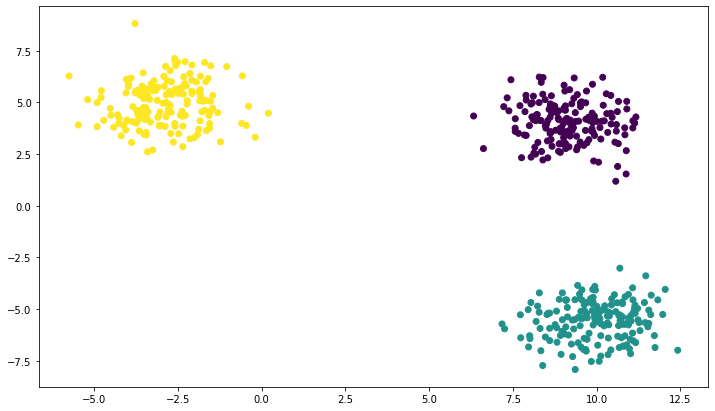

In [ ]:
X, y = make_blobs(n_samples=500,centers=3, random_state=24)
# X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
colors = ['blue', 'red', 'green']
plt.figure(figsize=(12,7))
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.show()

En los métodos de clustering implementados en scikit-learn el clustering funciona de la siguiente manera:

1. Inicializar el objeto, por ejemplo `modelo = AgglomerativeClustering()`.
2. Hacer fit: `modelo.fit(X)`. 
3. Para obtener las etiquetas hay dos opciones:
    * Obtener la lista de etiquetas de clusters como `y_clusters = modelo.predict(X)`.
    * Obtener la lista de etiquetas de clusters usando el atributo `labels_` como `y_clusters = modelo.labels_`.

También pueden obtenerse las etiquetas de los clusters directamente con el método `fit_transform()`.

> ### **AgglomerativeClustering**(n_clusters=2, affinity='euclidean', compute_full_tree='auto', linkage='ward', distance_threshold=None,compute_distances=False,...)

Prámetros:

- **n_clusters: n_clustersint or None, default=2**. 
El número de clusters a encontrar. Debe ser *None* si *distance_threshold* no es *None*.
- **affinity : str, default=’euclidean’**. Métrica utilizada para calcular la función liga (linkage).
- **compute_full_tree : ‘auto’ or bool, default=’auto’**. Detener anticipadamente la construcción del árbol en n_clusters.
- **linkage: {‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’**. 
Función liga a utilizar. La función liga determina la distancia a utilizar entre los conjuntos de observación. El algoritmo fusionará los pares de cluster que minimicen este criterio.

  * La liga *'ward'* minimiza la varianza de los clusters que se fusionan.

  * La liga *'average'* utiliza la media de las distancias de cada observación de los dos conjuntos.

  * La liga *'completa'* o 'máxima' utiliza las distancias máximas entre las observaciones de los dos conjuntos.

  * La liga "simple" utiliza el mínimo de las distancias entre las observaciones de los dos conjuntos.

- **distance_threshold : float, default=None**. El umbral de distancia de la función liga por encima del cual, los clusters no se fusionarán. Si no es *None*, *n_clusters* debe ser *None* y *compute_full_tree* debe ser *True*.


[0 1 2 3 4 5 6 7 8 9]


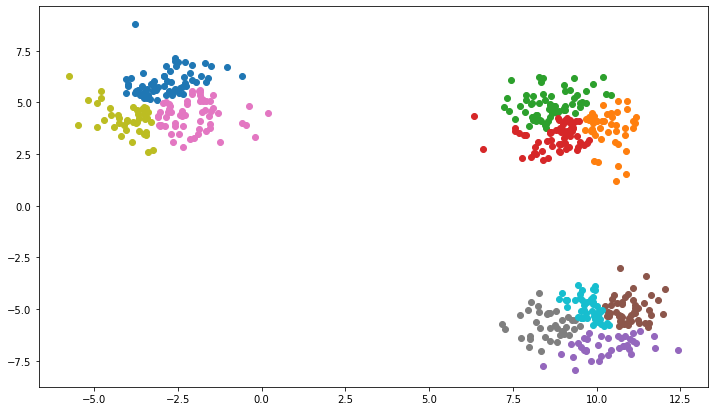

In [ ]:
modelo = AgglomerativeClustering(n_clusters=10,compute_full_tree=True)

yhat = modelo.fit_predict(X)

clusters = np.unique(yhat)
print(clusters)
plt.figure(figsize=(12,7))
for cluster in clusters:
    fila = np.where(yhat == cluster)
    plt.scatter(X[fila, 0], X[fila, 1])
plt.show()

In [ ]:
np.unique(modelo.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
modelo = AgglomerativeClustering(distance_threshold=0,n_clusters=None)

modelo.fit(X)
no_dendo = False

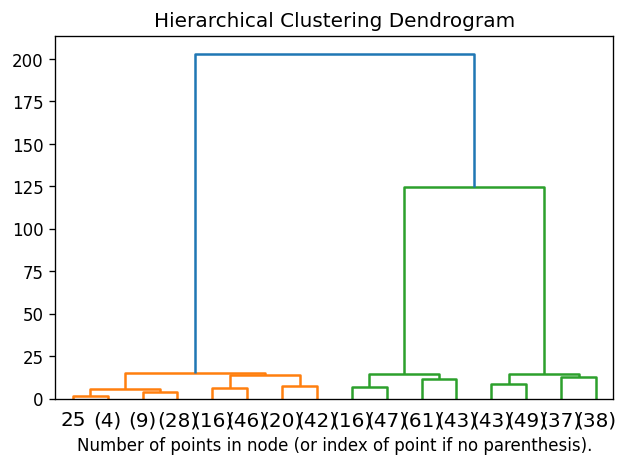

In [ ]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

if not no_dendo:
    plt.figure(dpi=120)
    plt.title('Hierarchical Clustering Dendrogram')
    # plot the top three levels of the dendrogram
    plot_dendrogram(modelo, truncate_mode='level', p=3)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()

   **Fuente**:[Dendpgram](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html)  

También podemos usar criterios externos para escoger un número de clusters adecuado. Por ejemplo, podemos usar el coeficiente de silueta. 



# Coeficiente de la Silueta.



Podemos definir el coeficiente de la silueta como:

- $a(x)$ : distancia promedio de x a todos los demás puntos en el mismo cluster.
- $b(x)$ : distancia promedio de x a todos los demás puntos en el cluster más cercano.

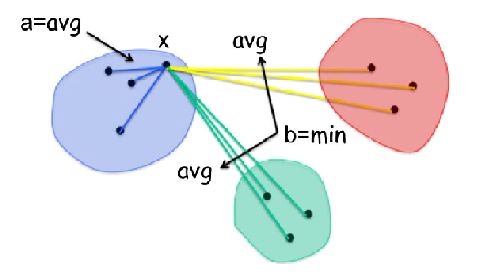



El coeficiente de silueta para $x$ se define como:

\begin{eqnarray*}
s(x) & = & \frac{b(x) - a(x)}{max\{a(x), b(x)\}}
\end{eqnarray*}

El coeficiente de la silueta para todo el agrupamiento es:

\begin{eqnarray*}
sc & = & \frac{1}{n} \sum_{i}^n s(x)
\end{eqnarray*}

Interpretación:
- Si el valor de la silueta está cerca de $1$, indica que los datos están bien agrupados.
- Si el valor de silueta está cerca de $–1$, indica que los datos están mal agrupados.
- $0$ si es indiferente.

In [ ]:
from sklearn.metrics import silhouette_score

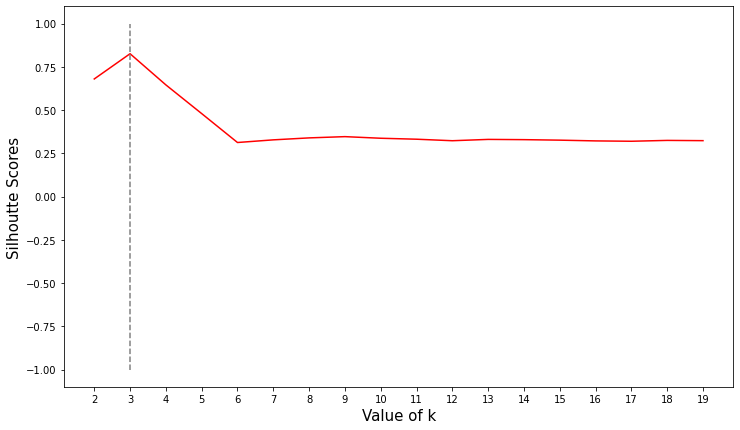

In [ ]:
max_num_clusters = 20

siluetas = []
k_values = list(range(2,max_num_clusters)) 
for k in k_values:
    ac = AgglomerativeClustering(n_clusters=k)
    ac.fit(X)
    labels = ac.labels_
    siluetas.append(silhouette_score(X, labels, metric='euclidean'))

plt.figure(figsize=(12,7))
plt.plot(k_values,siluetas,color='red')
plt.plot([3,3],[-1,1],linestyle='dashed',color='gray')
plt.xticks(k_values)
plt.ylabel("Silhoutte Scores", fontsize=15)
plt.xlabel("Value of k", fontsize=15)
plt.show()

# **K-Means clustering**

> ## * **KMeans**(n_clusters=8, init='k-means++', max_iter=300, random_state=None, ...)*

Parámetros:

- **n_clusters: int, default=8**. El número de clusters a formar así como el número de centroides a generar.
- **init : {‘k-means++’, ‘random’}**. 
  * 'k-means++' : selecciona los centros  iniciales para el clustering $k$-$means$ de forma inteligente para acelerar la convergencia.
  * 'random': elige $n\_clusters$ observaciones (filas) al azar para los centros iniciales.
- **max_iter: int, default=300**. Número máximo de iteraciones del algoritmo $k-means$ para una sola ejecución.
- **random_state: int, RandomState instance or None, default=None**.    Determina la generación de números aleatorios para la inicialización del centroide. Utilice un $int$ para que la aleatoriedad sea determinista.

In [ ]:
from sklearn.cluster import KMeans

[0 1 2]


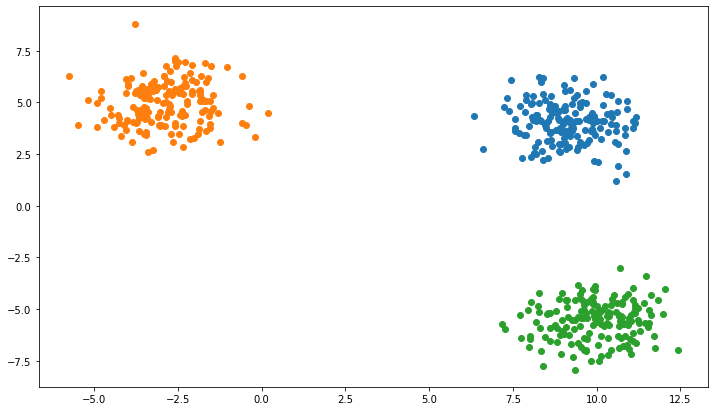

In [ ]:
modelo = KMeans(n_clusters=3)

modelo.fit(X)
# retorna las etiquetas 
y_clusters = modelo.predict(X)
# retorna número de clusters
clusters = np.unique(y_clusters)
print(clusters)
plt.figure(figsize=(12,7))
for cluster in clusters:
    fila = np.where(y_clusters == cluster)
    plt.scatter(X[fila, 0], X[fila, 1])

plt.show()

Veamos los centroides de cada cluster

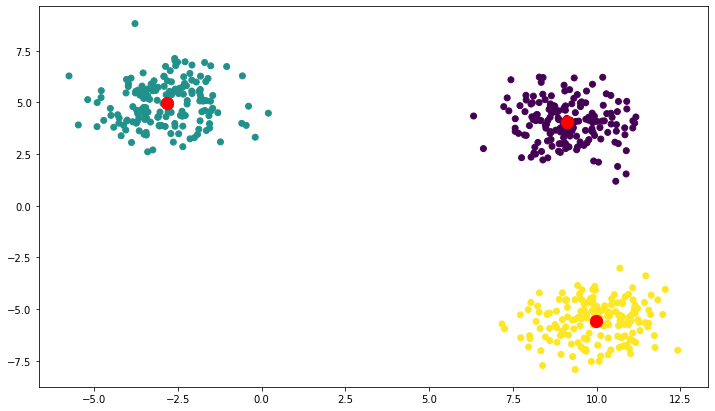

In [ ]:
centers = modelo.cluster_centers_

plt.figure(figsize=(12,7))
plt.scatter(X[:, 0], X[:, 1],c=y_clusters)
plt.scatter(centers[:,0],centers[:,1], color='red', marker='o', s=150)

plt.show()

# Selección del número de clusters

## **Inercia**

El algoritmo K-means tiene como objetivo elegir los centroides que minimicen la inercia, o el criterio de suma de cuadrados dentro de cada grupo:
\begin{eqnarray*}
\sum_{i=0}^n min_{\mu_j \in C} \left( ||x_i - \mu_j ||^2\right)
\end{eqnarray*}

La inercia como una medida de cohesión interna de las agrupaciones, sufre varios inconvenientes:
- La inercia  responde mal a los grupos alargados o a formas irregulares.

- La inercia no es una métrica normalizada: sólo sabemos que los valores más bajos son mejores y que cero es óptimo. En espacios de muy alta dimensión, las distancias euclidianas tienden a inflarse. La ejecución de un algoritmo de reducción de dimensiones, como el análisis de componentes principales (PCA), antes de la agrupación de k-means puede aliviar este problema y acelerar los cálculos.

## **Método del codo (Elbow method)**

El método del codo utiliza la distancia media de las observaciones a su centroide. Cuanto más grande es el número de clusters $k$, la inercia intra-cluster tiende a disminuir. Cuanto menor es la distancia intra-cluster mejor, ya que significa que los clústers son más compactos. **El método del codo busca el valor $k$ que satisfaga que un incremento de $k$, no mejore sustancialmente la inercia**.

Una mejor alternativa al método del codo es el coeficiente de silueta, que es más objetivo que el método del codo.

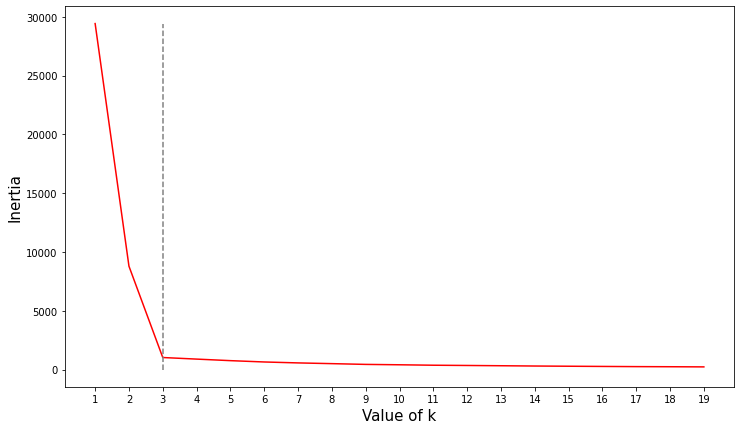

In [ ]:
max_num_clusters = 20

inertias = []
k_values = list(range(1,max_num_clusters)) 
for k in k_values:
    modelo = KMeans(n_clusters=k)
    modelo.fit(X)
    inertias.append(modelo.inertia_)

plt.figure(figsize=(12,7))
plt.plot(k_values,inertias,color='red')
plt.plot([3,3],[0,max(inertias)],linestyle='dashed',color='gray')
plt.ylabel("Inertia", fontsize=15)
plt.xlabel("Value of k", fontsize=15)
plt.xticks(k_values)
plt.show()

## **Coeficiente de Silueta**

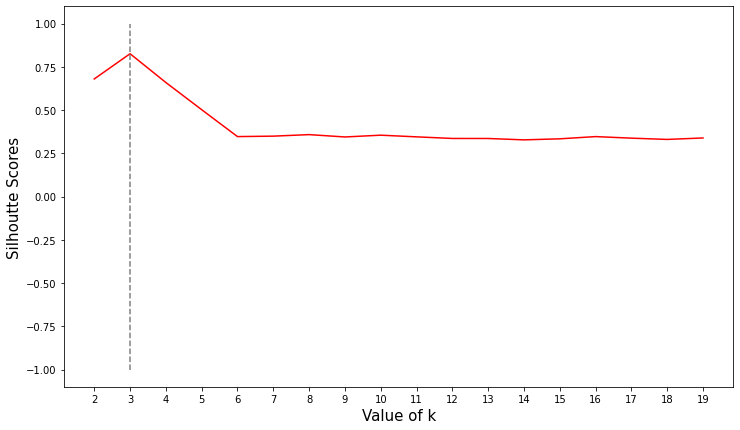

In [ ]:
max_num_clusters = 20

siluetas = []
k_values = list(range(2,max_num_clusters)) 
for k in k_values:
    modelo = KMeans(n_clusters=k)
    modelo.fit(X)
    labels = modelo.labels_
    siluetas.append(silhouette_score(X, labels, metric='euclidean'))

plt.figure(figsize=(12,7))
plt.plot(k_values,siluetas,color='red')
plt.plot([3,3],[-1,1],linestyle='dashed',color='gray')
plt.xticks(k_values)
plt.ylabel("Silhoutte Scores", fontsize=15)
plt.xlabel("Value of k", fontsize=15)
plt.show()

Podemos apreciar que la inercia y el coeficiente de silueta coinciden, no siempre va a ser el caso, por lo que bajo cierto criterio se decidiría entre uno u otro.

# **Density-Based Spatial Clustering of Applications with Noise (DBSCAN)**

- Es un algoritmo de clustering basado en densidad, no en distancia.
- Infiere automáticamente el número de grupos. 

- Útiles cuando los clusters tienen formas irregulares, están entrelazados o hay ruido/outliers en los datos. 

- Criterio de agrupamiento local: Regiones densas de puntos separadas de otras regiones densas por regiones poco densas.

Algunas características:
- Identifican clusters de formas arbitrarias.
- Robustos ante la presencia de ruido.
- Un único recorrido del conjunto de datos.

Algorimos basados en densidad más comunes:
- DBSCAN : Density Based Spatial Clustering of
Applications with Noise ($1996$).
- DENCLUE: DENsity-based CLUstEring ($1998$)
- OPTICS: Ordering Points To Identify the Clustering
Structure ($1999$)
- CLIQUE : Clustering in QUEst ($1998$).


Definiciones:

* **Densidad**: Número de puntos en un radio específico
(parámetro Epsilon)

* **Puntos “core”**: Puntos interiores de un cluster
(cuando tienen, al menos, un número mínimo de
puntos MinPts en su vecindario de radio épsilon)
* **Puntos “border” (frontera)**: Tienen menos de MinPts
puntos en su vecindario de radio épsilon, estando en
el vecindario de algún punto “core”.
* **Ruido (noise)**: Cualquier punto que no forma parte de
un cluster (“core”) ni está en su frontera (“border”).


DBSCAN recibe los siguientes parámetros:
- épsilon : Define el radio a partir del cual buscar ejemplos vecinos.
- minPoints : Mínimo número necesario para formar un cluster.

Cada ejemplo (observación) en el conjunto de datos es clasificado como:
- **Core Point** : ejemplos que tienen al menos un número $minPoints$ de ejemplos dentro de $épsilon$.
- **Border Points** : No son $Core Points$ pero se encuentra dentro del radio de un $Core Point$.
- **Noise Points** : No son $Core Points$ ni $Border Points$.

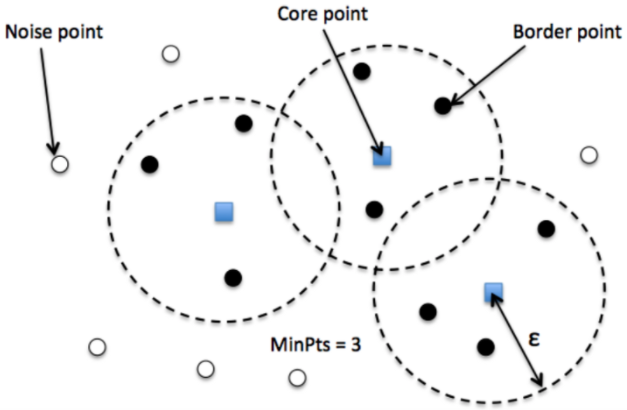



**Fuente**: [Imagen](https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html)

> * **DBSCAN**(eps=0.5, min_samples=5, metric='euclidean', ...)*

Parámetros:

- **eps: float, default=0.5**. La distancia máxima entre dos muestras para que una se considere en la vecindad de la otra.
- **min_samples: int, default=5**. El número de muestras en una vecindad para que un punto sea considerado como punto central. 
- **metric: str, or callable, default=’euclidean’**. La métrica que se utilizará cuando se calcule la distancia entre instancias en una matriz de características.


**Fuente:** [Clustering](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py)

In [ ]:
from sklearn.cluster import DBSCAN

[-1  0  1  2]


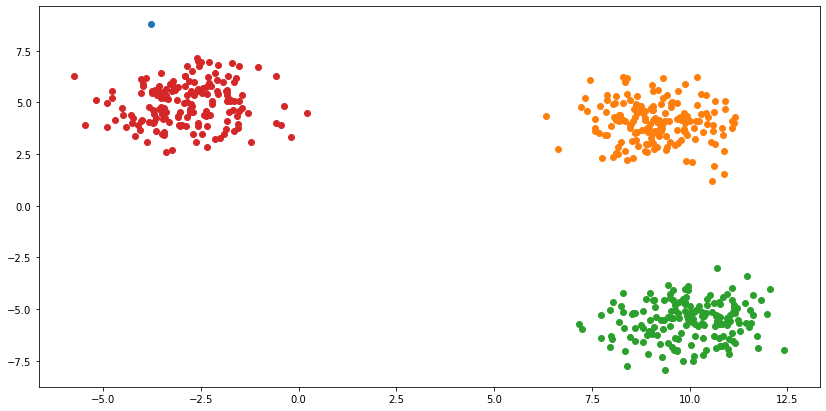

In [ ]:
modelo = DBSCAN(eps=2, min_samples=9)

yhat = modelo.fit_predict(X)

clusters = np.unique(yhat)
print(clusters)

plt.figure(figsize=(14,7))
for cluster in clusters:
    fila = np.where(yhat == cluster)
    plt.scatter(X[fila, 0], X[fila, 1])

plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors

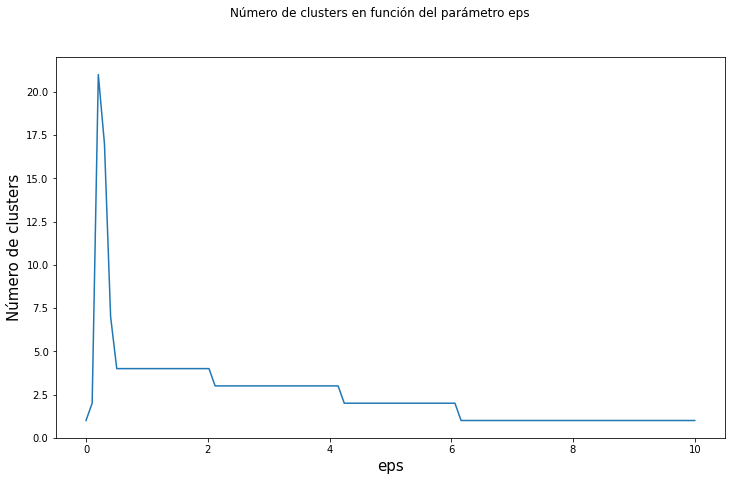

In [ ]:
num_clusters = []
for eps in np.linspace(0.001,10,100):
    modelo = DBSCAN(eps=eps, min_samples=5)
    yhat = modelo.fit_predict(X)
    
    clusters = np.unique(yhat)
    num_clusters.append(len(clusters))
    
plt.figure(figsize=(12,7))
plt.plot(list(np.linspace(0,10,100)),num_clusters)
plt.suptitle("Número de clusters en función del parámetro eps")
plt.xlabel("eps",fontsize=15)
plt.ylabel("Número de clusters", fontsize=15) 
plt.show()

Una alternativa, es obtener las distancias de los $k$ vecinos más cercanos para cada punto, ordenar las distancias, y gráficamente encontrar el punto donde la curvatura es máxima.

In [ ]:
nn_model = NearestNeighbors(n_neighbors=2)
nn_model.fit(X)
distances, indices = nn_model.kneighbors(X)

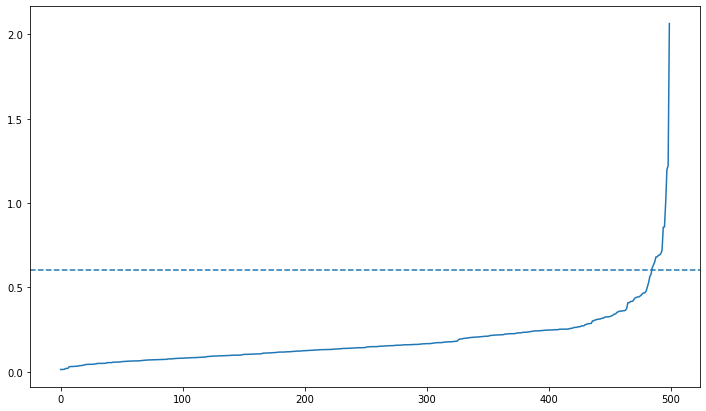

In [ ]:
distances = np.sort(distances, axis=0)
#print(distances)
distances = distances[:,1]
plt.figure(figsize=(12, 7))
plt.plot(distances)
plt.axhline(y=.6, xmin=0, xmax=2, linestyle= '--')
plt.show()

[-1  0  1  2]


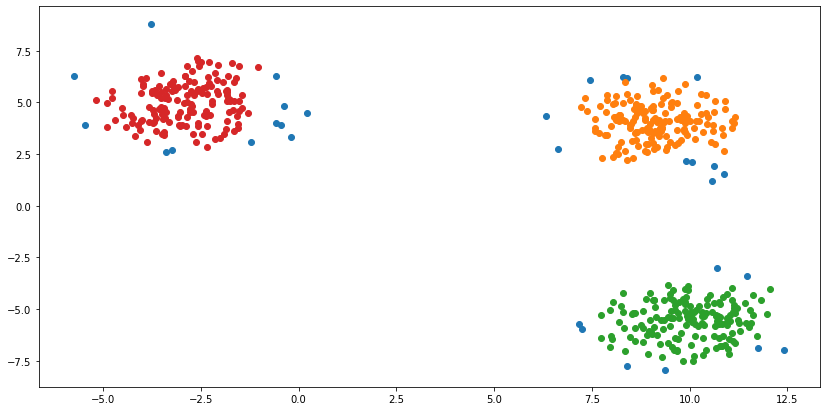

In [ ]:
modelo = DBSCAN(eps=0.6, min_samples=5)

yhat = modelo.fit_predict(X)

clusters = np.unique(yhat)
print(clusters)
plt.figure(figsize=(14,7))
for cluster in clusters:
    fila = np.where(yhat == cluster)
    plt.scatter(X[fila, 0], X[fila, 1])

plt.show()

# **Ejemplo:**

**¿Puedes encontrar buenos clusterings para los siguientes datasets?**

Prueba los métodos principales que vimos: K-means (¿cómo escoges $K$?), AgglomerativeClustering, DBSCAN para buscar el mejor clustering. Los criterios de evaluación son:

* Silhoutte score, para K-Means y AgglomerativeClustering.

In [ ]:
from sklearn.datasets import make_moons, make_blobs

n_samples = 500
# datasets 
DB2 = make_moons(n_samples=n_samples, noise=.05)
DB3 = make_blobs(n_samples=n_samples, random_state=8)
DB4 = np.random.rand(n_samples, 2), 1
DB5 = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170)

Ejemplo para DB2

In [ ]:
X, y = DB2

In [ ]:
len(DB4)

2

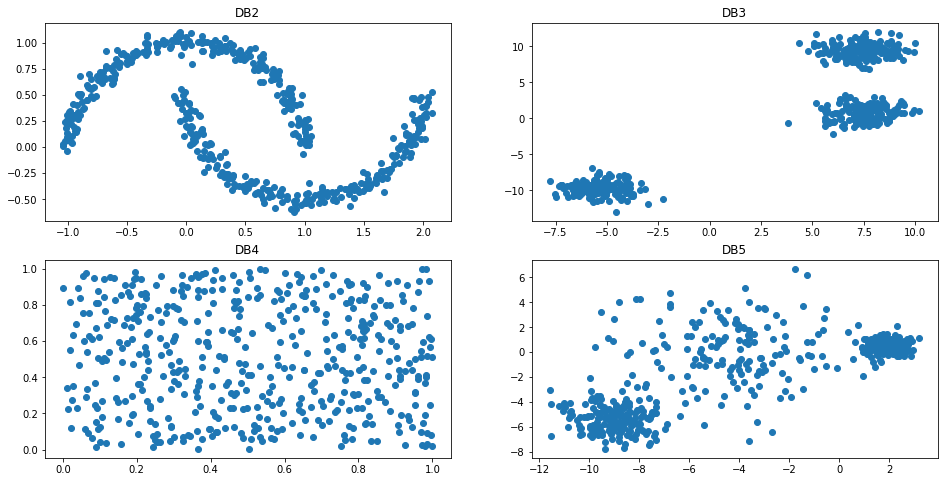

In [ ]:
# list of datasets
datasets = [DB2, DB3, DB4, DB5]
# names 
names = ['DB2', 'DB3', 'DB4', 'DB5']
# subplot
fig, axes = plt.subplots(2,2, figsize=(16,8))
i = 0
for row in range(2):
  for col in range(2):
    X, y = datasets[i]
    axes[row][col].scatter(X[:,0],X[:,1])
    axes[row][col].set_title(names[i])
    i = i + 1
plt.show()

# **Solución:**

# **K-Means**

In [ ]:
X, y = DB2

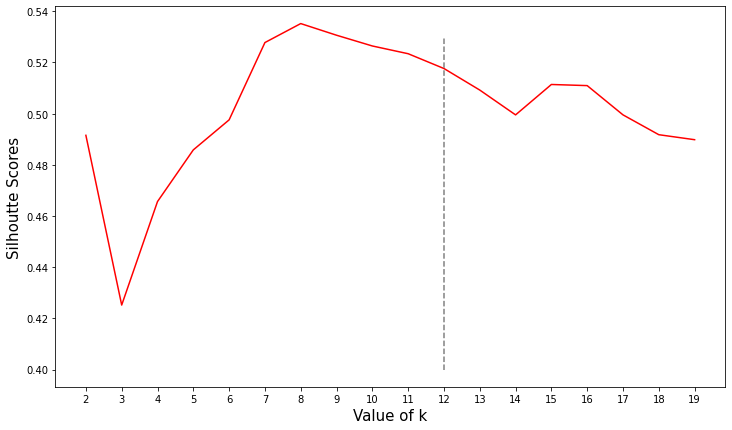

In [ ]:
max_num_clusters = 20

siluetas = []
k_values = list(range(2,max_num_clusters)) 
for k in k_values:
    modelo = KMeans(n_clusters=k, random_state=42)
    modelo.fit(X)
    labels = modelo.labels_
    siluetas.append(silhouette_score(X, labels, metric='euclidean'))

plt.figure(figsize=(12,7))
plt.plot(k_values,siluetas,color='red')
plt.plot([12,12],[0.4,0.53],linestyle='dashed',color='gray')
plt.xticks(k_values)
plt.ylabel("Silhoutte Scores", fontsize=15)
plt.xlabel("Value of k", fontsize=15)
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11]


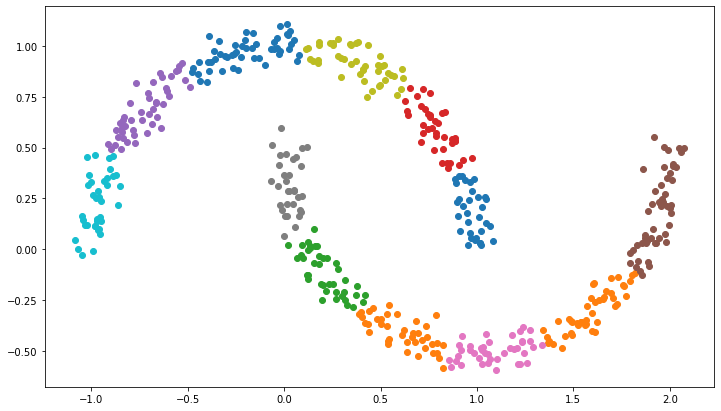

In [ ]:
modelo = KMeans(n_clusters=12)

modelo.fit(X)
# retorna las etiquetas 
y_clusters = modelo.predict(X)
# retorna número de clusters
clusters = np.unique(y_clusters)
print(clusters)
plt.figure(figsize=(12,7))
for cluster in clusters:
    fila = np.where(y_clusters == cluster)
    plt.scatter(X[fila, 0], X[fila, 1])

plt.show()

# **Agglomerative Clustering**

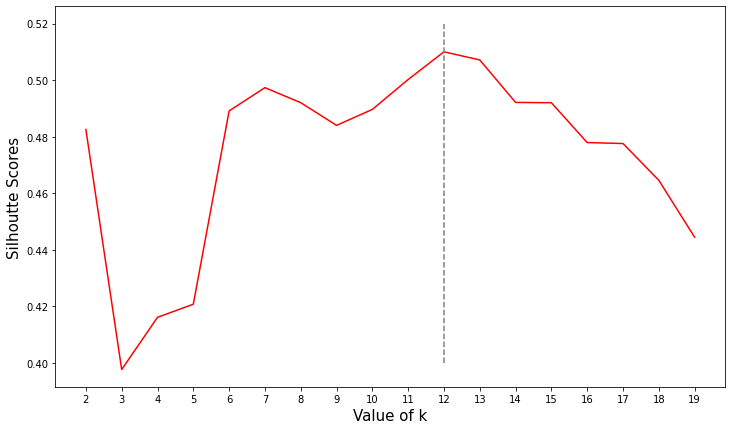

In [ ]:
max_num_clusters = 20

siluetas = []
k_values = list(range(2,max_num_clusters)) 
for k in k_values:
    ac = AgglomerativeClustering(n_clusters=k)
    ac.fit(X)
    labels = ac.labels_
    siluetas.append(silhouette_score(X, labels, metric='euclidean'))

plt.figure(figsize=(12,7))
plt.plot(k_values,siluetas,color='red')
plt.plot([12,12],[0.4,0.52],linestyle='dashed',color='gray')
plt.xticks(k_values)
plt.ylabel("Silhoutte Scores", fontsize=15)
plt.xlabel("Value of k", fontsize=15)
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11]


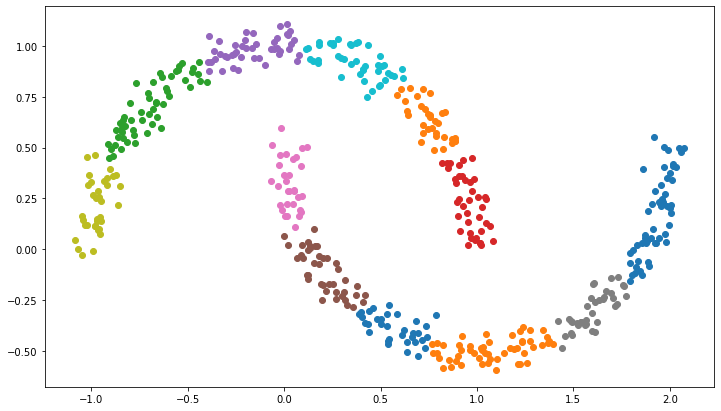

In [ ]:
modelo = AgglomerativeClustering(n_clusters=12)

modelo.fit(X)
# retorna las etiquetas 
y_clusters = modelo.labels_
# retorna número de clusters
clusters = np.unique(y_clusters)
print(clusters)
plt.figure(figsize=(12,7))
for cluster in clusters:
    fila = np.where(y_clusters == cluster)
    plt.scatter(X[fila, 0], X[fila, 1])

plt.show()

# **DBSCAN**

In [ ]:
nn_model = NearestNeighbors(n_neighbors=3)
nn_model.fit(X)
distances, indices = nn_model.kneighbors(X)

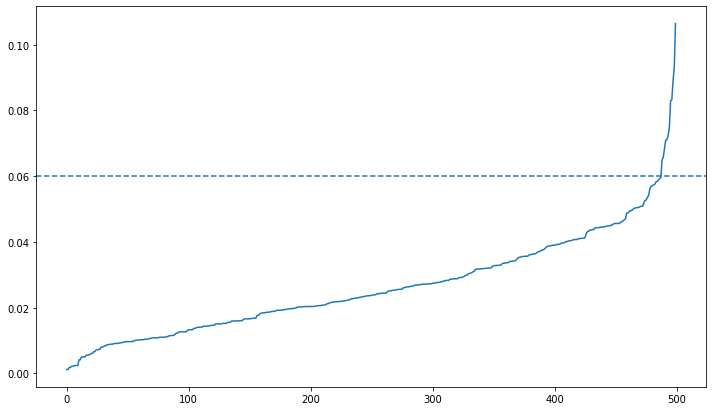

In [ ]:
distances = np.sort(distances, axis=0)
#print(distances)
distances = distances[:,1]
plt.figure(figsize=(12, 7))
plt.plot(distances)
plt.axhline(y=0.06, xmin=0, xmax=2, linestyle= '--')
plt.show()

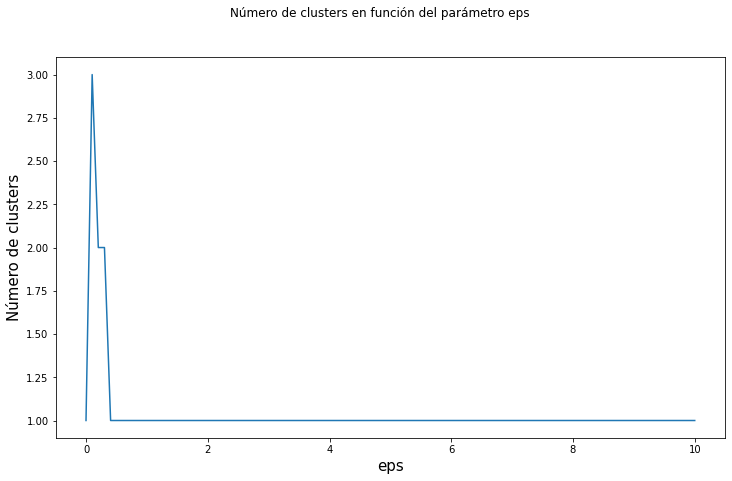

In [ ]:
num_clusters = []
for eps in np.linspace(0.001,10,100):
    modelo = DBSCAN(eps=eps, min_samples=5)
    yhat = modelo.fit_predict(X)
    
    clusters = np.unique(yhat)
    num_clusters.append(len(clusters))
    
plt.figure(figsize=(12,7))
plt.plot(list(np.linspace(0,10,100)),num_clusters)
plt.suptitle("Número de clusters en función del parámetro eps")
plt.xlabel("eps",fontsize=15)
plt.ylabel("Número de clusters", fontsize=15) 
plt.show()

[0 1]


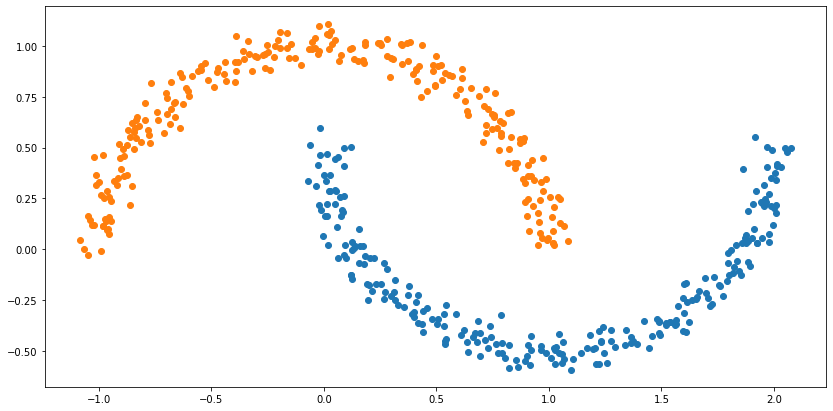

In [ ]:
modelo = DBSCAN(eps=0.2, min_samples=5)

yhat = modelo.fit_predict(X)

clusters = np.unique(yhat)
print(clusters)

plt.figure(figsize=(14,7))
for cluster in clusters:
    fila = np.where(yhat == cluster)
    plt.scatter(X[fila, 0], X[fila, 1])

plt.show()

# DB5

In [ ]:
X, y = DB5

# K-Means

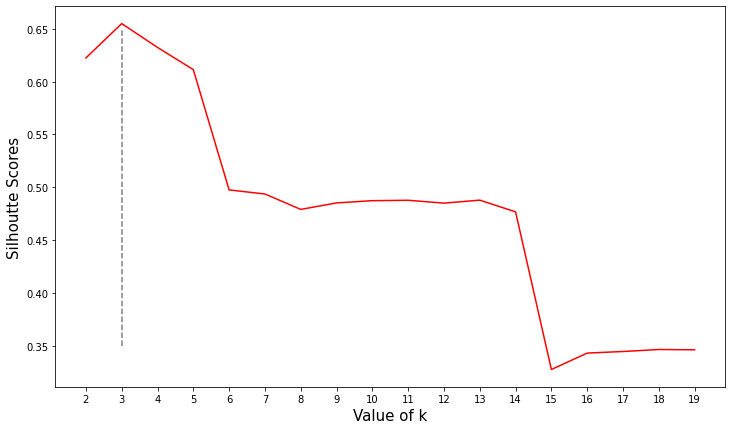

In [ ]:
max_num_clusters = 20

siluetas = []
k_values = list(range(2,max_num_clusters)) 
for k in k_values:
    modelo = KMeans(n_clusters=k, random_state=42)
    modelo.fit(X)
    labels = modelo.labels_
    siluetas.append(silhouette_score(X, labels, metric='euclidean'))

plt.figure(figsize=(12,7))
plt.plot(k_values,siluetas,color='red')
plt.plot([3,3],[0.35,0.65],linestyle='dashed',color='gray')
plt.xticks(k_values)
plt.ylabel("Silhoutte Scores", fontsize=15)
plt.xlabel("Value of k", fontsize=15)
plt.show()

[0 1 2]


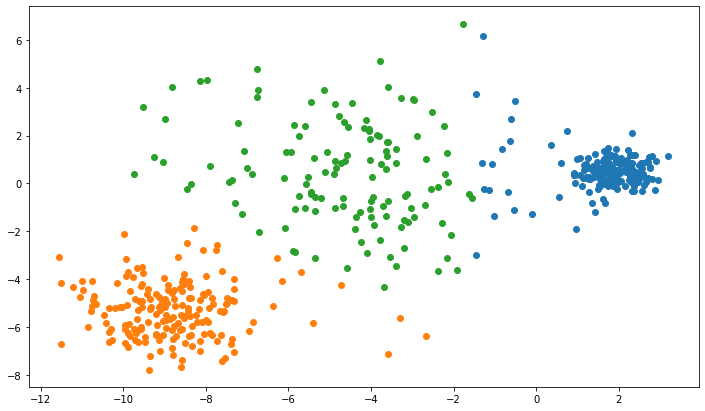

In [ ]:
modelo = KMeans(n_clusters=3)

modelo.fit(X)
# retorna las etiquetas 
y_clusters = modelo.predict(X)
# retorna número de clusters
clusters = np.unique(y_clusters)
print(clusters)
plt.figure(figsize=(12,7))
for cluster in clusters:
    fila = np.where(y_clusters == cluster)
    plt.scatter(X[fila, 0], X[fila, 1])

plt.show()

# Aglomerativo

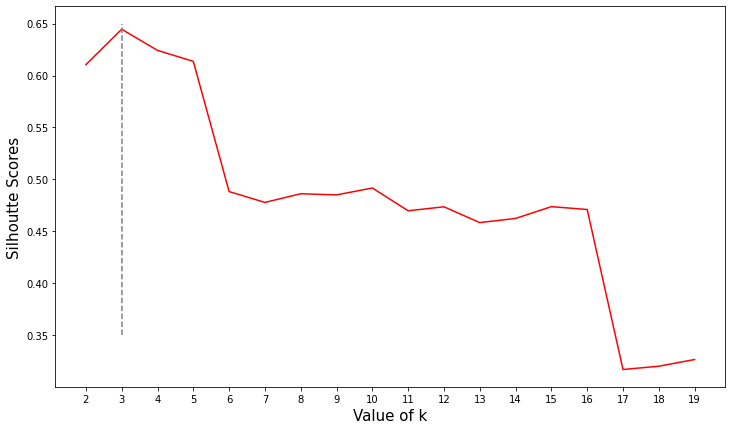

In [ ]:
max_num_clusters = 20

siluetas = []
k_values = list(range(2,max_num_clusters)) 
for k in k_values:
    ac = AgglomerativeClustering(n_clusters=k)
    ac.fit(X)
    labels = ac.labels_
    siluetas.append(silhouette_score(X, labels, metric='euclidean'))

plt.figure(figsize=(12,7))
plt.plot(k_values,siluetas,color='red')
plt.plot([3,3],[0.35,0.65],linestyle='dashed',color='gray')
plt.xticks(k_values)
plt.ylabel("Silhoutte Scores", fontsize=15)
plt.xlabel("Value of k", fontsize=15)
plt.show()

[0 1 2]


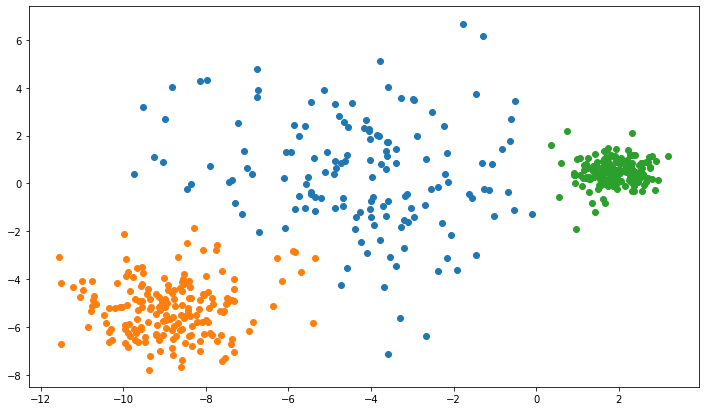

In [ ]:
modelo = AgglomerativeClustering(n_clusters=3)

modelo.fit(X)
# retorna las etiquetas 
y_clusters = modelo.labels_
# retorna número de clusters
clusters = np.unique(y_clusters)
print(clusters)
plt.figure(figsize=(12,7))
for cluster in clusters:
    fila = np.where(y_clusters == cluster)
    plt.scatter(X[fila, 0], X[fila, 1])

plt.show()

# DBSCAN

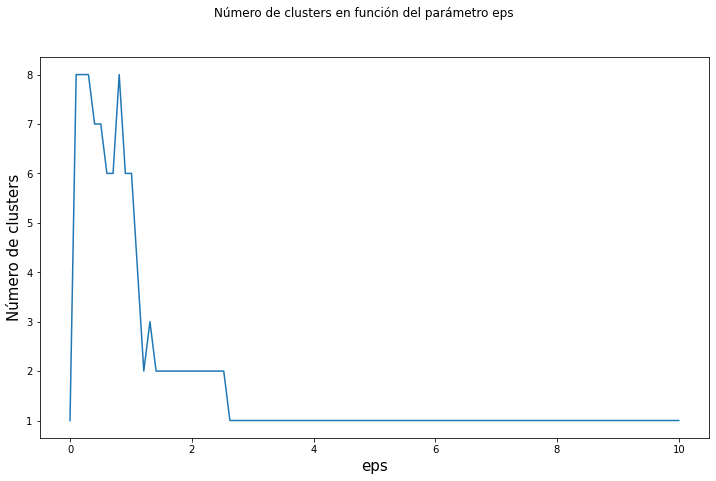

In [ ]:
num_clusters = []
for eps in np.linspace(0.001,10,100):
    modelo = DBSCAN(eps=eps, min_samples=5)
    yhat = modelo.fit_predict(X)
    
    clusters = np.unique(yhat)
    num_clusters.append(len(clusters))
    
plt.figure(figsize=(12,7))
plt.plot(list(np.linspace(0,10,100)),num_clusters)
plt.suptitle("Número de clusters en función del parámetro eps")
plt.xlabel("eps",fontsize=15)
plt.ylabel("Número de clusters", fontsize=15) 
plt.show()

[-1  0  1  2  3  4  5  6]


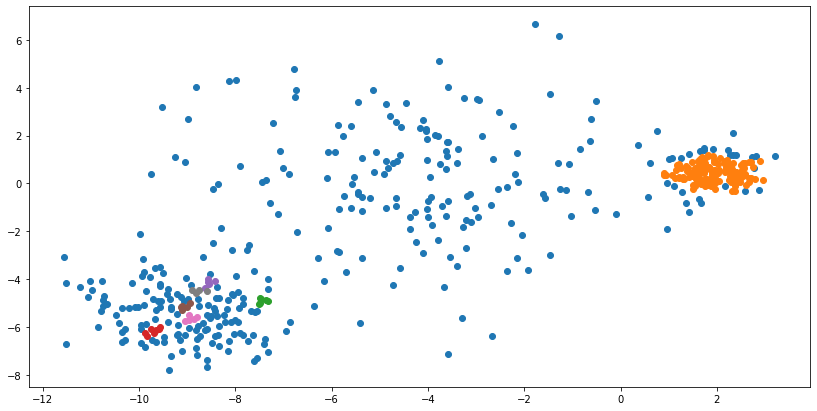

In [ ]:
modelo = DBSCAN(eps=0.2, min_samples=5)

yhat = modelo.fit_predict(X)

clusters = np.unique(yhat)
print(clusters)

plt.figure(figsize=(14,7))
for cluster in clusters:
    fila = np.where(yhat == cluster)
    plt.scatter(X[fila, 0], X[fila, 1])

plt.show()